# **Chapter 4. 머신러닝(Machine Learning) 기초** 

---
### **학습 목표**
> 4-1. 머신 러닝 개요 <br>
> 4-2. sklearn 이란? <br>
> 4-3. 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할) <br>
> 4-4. 분류 분석 모델링 <br>
> 4-5. 분류 성능 평가하기 <br>

## **4-1. 머신 러닝 개요**

## **4-2. sklearn 이란?**

## **4-3 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할)**

> - 머신러닝을 적용할 때 가장 중요한 부분은 '**데이터 전처리**' 이다.
- 보통 데이터 분석가는 머신러닝 모델의 성능을 향상하기 위한 작업 중 70% 이상의 시간을 전처리에 할애한다.
- 전처리 작업에는 **결측값 처리, 정규화/표준화(수치형), 범주형 데이터의 수치형 변환, 학습/테스트 분할, Feature Engineering** 등이 있다.

In [ ]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# 실습 데이터 세트 로드 (펭귄 데이터)
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


info()를 통해 전반적인 정보를 살펴봤을 때 결측값이 많이 없는 것으로 확인이 되기 때문에 결측값을 제거하도록 하자

In [ ]:
# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


### **4-3-1. 정규화(Normalization), 표준화(Standardization)**

> - 정규화와 표준화는 모두 수치형 데이터 전처리에서 중요한 요소이다.
- 학습 데이터의 feature 간 단위나 스케일(sclae) 차이가 클 수록 학습 모델의 성능이 저하될 수 있다.<br>
따라서 수치형 데이터의 단위를 맞춰주는 작업인 ***스케일링(scaling)***이 필요하다.
- 스케일링에는 일정 구간을 정해주는 ***정규화(Normalization)*** 방법과 평균(0)과 표준편자(1)를 사용하는 ***표준화(Standardization)*** 방법이 있다.

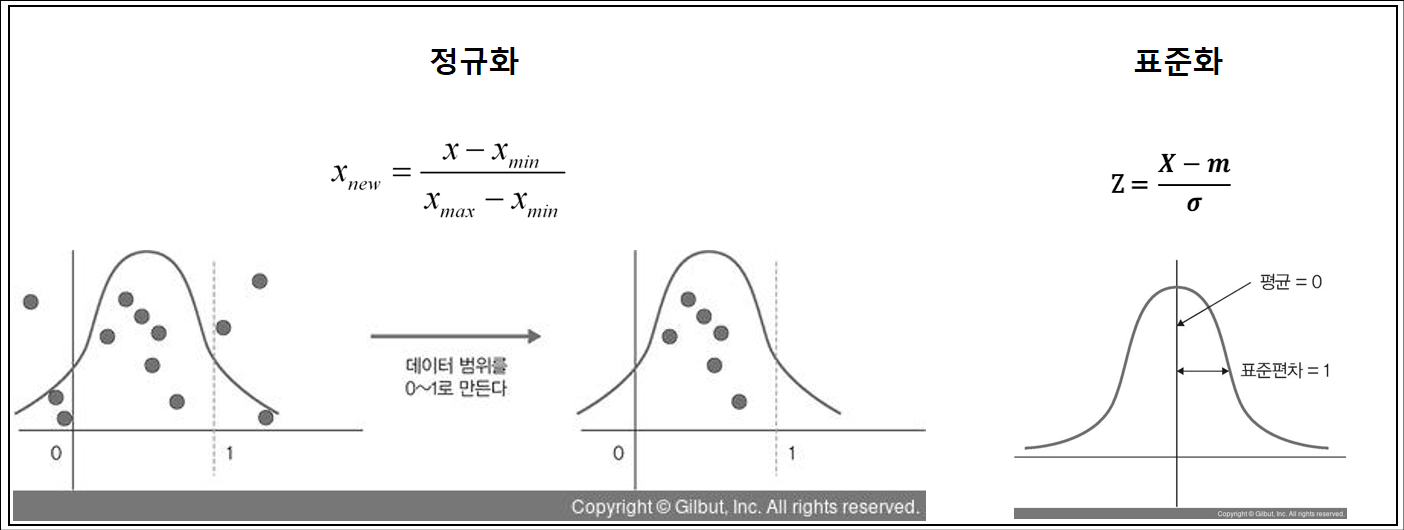

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


penguins의 데이터를 살펴보면 feature들 간의 단위가 다르다는 것을 알할 수 있다.

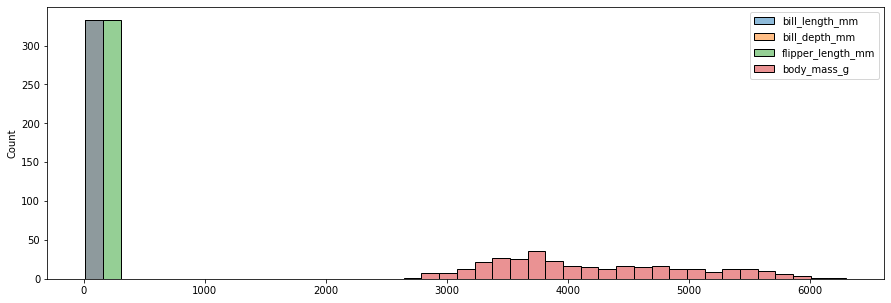

In [ ]:
# 데이터 분포 확인
plt.figure(figsize=(15,5))
sns.histplot(data=penguins)

> **1. 정규화(Normalization)**
- `MinMaxScaler`를 활용하여 0~1 사이 분포를 만들기
- 같은 범위의 데이터로 변환하기 때문에, **모델 학습 성능이 좋아지고, 학습시간이 줄어드는 효과**가 있다
- 자릿수가 늘어나지 않아 **연산 오버플로우(numeric overflow)**를 방지할 수 있다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # 라이브러리 로딩
scaler = MinMaxScaler() # 스케일러 정의

penguins_normed = penguins.copy()
features = penguins_normed[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]     # 정규화 대상 컬럼
features_normed = scaler.fit_transform(features)    # 정규화

In [ ]:
# 정규화된 데이터로 바꿔주기
penguins_normed = penguins_normed.assign(bill_length_mm = features_normed[:,0],
                                         bill_depth_mm =  features_normed[:,1],
                                         flipper_length_mm = features_normed[:,2],
                                         body_mass_g = features_normed[:,3])
penguins_normed

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
329,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
330,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
331,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


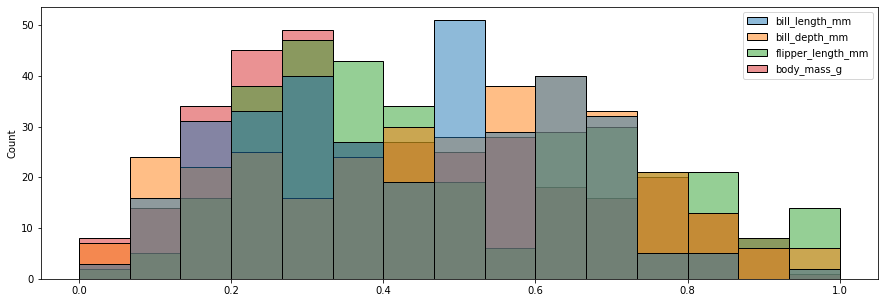

In [ ]:
# 데이터 분포 확인
plt.figure(figsize=(15,5))
sns.histplot(data=penguins_normed)

> **2. 표준화(Standardization)**
- `StandardScaler`를 활용하여 평균 0, 표준편자 1인 분포 만들기
- **Feature간 단위 차이가 극심하게 차이가 나는 상황**에서 정규화 보다는 표준화 방법이 선호된다.
    - 정규화는 작은 범위로 데이터를 압축하기 때문에 정보 손실이 발생한다.
- **비지도 학습(최대 최소 범위를 알기 힘든 상황)**에서도 표준화 방법이 선호된다.

In [ ]:
from sklearn.preprocessing import StandardScaler    # 라이브러리 로딩
scaler = StandardScaler()   # 스케일러 정의

penguins_scaled = penguins.copy()
features = penguins_scaled[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]     # 표준화 대상 컬럼
features_stand = scaler.fit_transform(features)     # 표준화

In [ ]:
# 표준화된 데이터로 바꿔주기
penguins_scaled = penguins_scaled.assign(bill_length_mm = features_stand[:,0],
                                         bill_depth_mm = features_stand[:,1],
                                         flipper_length_mm = features_stand[:,2],
                                         body_mass_g = features_stand[:,3])

penguins_scaled

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


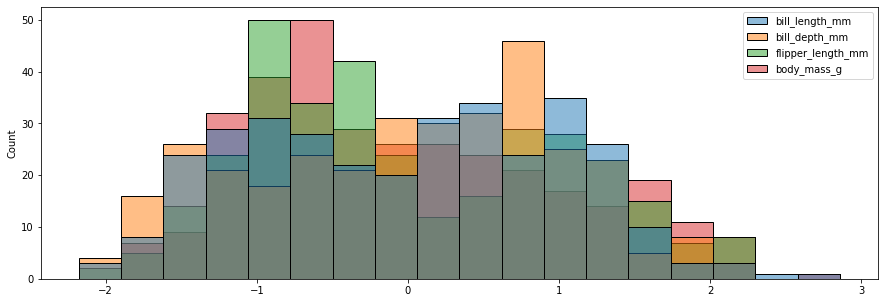

In [ ]:
# 데이터 분포 확인
plt.figure(figsize=(15,5))
sns.histplot(data=penguins_scaled)

### **4-3-2. 범주형 데이터의 수치화(인코딩, Encoding)**

> - scikit-learn의 머신러닝 알고리즘은 범주형 데이터를 계산할 수 없다.
- 따라서 일반적으로 범주형 데이터를 **수치화(인코딩)**해서 사용한다.
- 대표적인 범주형 데이터 수치화 방법
    - `라벨 인코딩(Label Encoding)`
    - `원핫 인코딩(One-hot Encoding)`

In [ ]:
penguins_scaled

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


In [ ]:
penguins_scaled['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
penguins_scaled['sex'].unique()

array(['Male', 'Female'], dtype=object)

> **1. 라벨 인코딩 (Label Encoding)**
- 범주형 데이터의 **범주 가짓수에 따라 숫자를 할당해주는 방법**이다.

In [ ]:
from sklearn.preprocessing import LabelEncoder     # 라이브러리 로딩
encoder = LabelEncoder()    # 인코더 정의

penguins_label = penguins_scaled.copy()
features = penguins_label[['species', 'island', 'sex']]     # 인코딩 대상 컬럼
encoded = features.apply(encoder.fit_transform)     # 인코딩 실행

In [ ]:
# 수치형 데이터로 바꿔주기
penguins_label = penguins_label.assign(species = encoded['species'],
                                       island = encoded['island'],
                                       sex = encoded['sex'])
penguins_label

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
328,2,0,47.2,13.7,214.0,4925.0,0
329,2,0,46.8,14.3,215.0,4850.0,0
330,2,0,50.4,15.7,222.0,5750.0,1
331,2,0,45.2,14.8,212.0,5200.0,0


> **2. 원핫 인코딩 (One Hot Encoding)**
- 범주형 데이터의 **범주 가짓수에 컬럼을 추가**해주는 방법이다.
- 범주에 포함되는 컬럼에 1을 부여하고 다른 컬럼은 0을 부여한다.

In [ ]:
from sklearn.preprocessing import OneHotEncoder     # 라이브러리 로딩
encoder = OneHotEncoder()   # 인코더 정의

penguins_onehot = penguins_scaled.copy()
features = penguins_onehot[['species', 'island', 'sex']]    # 인코딩 대상 컬럼
encoded = encoder.fit_transform(features).toarray()     # 인코딩 실행

In [ ]:
encoded

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [ ]:
# 어떤 항목이 인코딩 되었는지 확인
encoder.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

`.categories_`는 scikit-learn에서 생성해야 할 컬럼을 자동적으로 미리 만들어둔 것이다.

In [ ]:
# 기존 범주형 컬럼 버리기
penguins_onehot = penguins_onehot.drop(columns=['species', 'island', 'sex'])

# 인코딩 결과 데이터프레임 생성
encoded_df = pd.DataFrame(encoded)
encoded_df.columns = encoder.get_feature_names_out()

# 기존 데이터프레임과 결합
penguins_onehot = pd.concat([penguins_onehot, encoded_df], axis=1)

`.get_feaeture_names_out()` : 변환된 특성 종류를 확인할 수 있는 메소드

In [ ]:
penguins_onehot

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36.7,19.3,193.0,3450.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,39.3,20.6,190.0,3650.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
329,46.8,14.3,215.0,4850.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
330,50.4,15.7,222.0,5750.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
331,45.2,14.8,212.0,5200.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### **4-3-3. 학습/테스트 데이터 세트 분할**

> - scikit-learn은 학습/테스트 데이터 세트를 자동으로 분할해주는 기능을 제공한다.
- 테스트에 사용하고 싶은 데이터를 비율로 조정할 수 있다.

In [ ]:
penguins_label.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


In [ ]:
from sklearn.model_selection import train_test_split    # 라이브러리 로딩

X = penguins_label.drop('sex', axis=1)  # 예측에 사용할 변수
Y = penguins_label['sex']   # 예측할 변수

In [ ]:
# 학습 / 테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [ ]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(266, 266, 67, 67)

In [ ]:
X_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
68,0,2,35.5,17.5,190.0,3700.0
197,1,1,51.4,19.0,201.0,3950.0
157,1,1,51.7,20.3,194.0,3775.0
74,0,2,34.6,17.2,189.0,3200.0
114,0,2,36.2,17.2,187.0,3150.0
...,...,...,...,...,...,...
99,0,0,39.7,18.9,184.0,3550.0
325,2,0,46.2,14.1,217.0,4375.0
9,0,2,34.6,21.1,198.0,4400.0
90,0,1,38.1,18.6,190.0,3700.0


In [ ]:
Y_test

148    1
236    0
165    1
273    0
7      0
      ..
306    0
256    1
44     0
161    1
313    1
Name: sex, Length: 67, dtype: int64

## **4-4. 분류 분석 모델링**
> #### 분류 분석(Classification)이란?
- 데이터가 어느 그룹에 속하는지 예측하는 것
- 군집 분석(Clustiong)과 유사하지만, 분류 분석은 각 그룹이 사전에 정의되어 있다.
- 문제와 해답을 모두 가지고 학습하는 **지도 학습(Supervised Learning)** 유형이다.
- 분류 분석 예시
    - 이탈 고객 예측, 스팸 메일 분류, 이미지 분류(개, 고양이) 등

In [ ]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# 실습 데이터 세트 로드 (펭귄 데이터)
penguins = sns.load_dataset('penguins')

# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **4-4-1. 데이터 세트 소개**

> - 2020 년에 공개된 **데이터 탐색 (EDA), 분류 분석 용 데이터 세트**
> - Palmer Station 에서 수집한 **남극에 서식하는 344 마리의 펭귄 정보**를 담고 있다.
> - **붓꽃 데이터 (iris) 의 대안**으로 최근에 각광받는 데이터이다.
> - [원본 데이터 (Palmer Penguins)](https://github.com/allisonhorst/palmerpenguins)

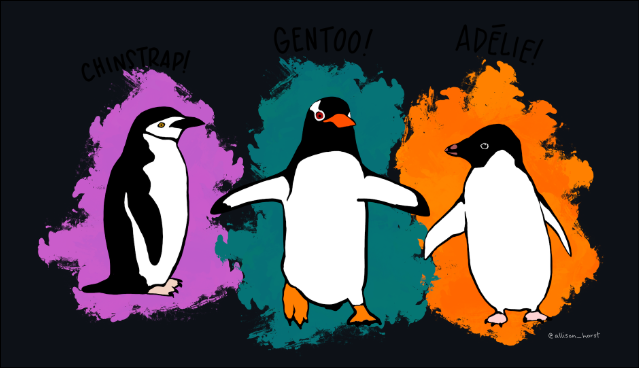

### **4-4-2. 데이터 전처리**

In [ ]:
# 결측값 확인
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [ ]:
# 수치형, 범주형 데이터 확인
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


> **정규화(Normalization)**
- 수치형 변수들의 단위를 맞추기 위해서 데이터 정규화를 진행
- `MinMaxScaler` 함수를 사용해 0~1 사이 값으로 맞춘다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler      # 라이브러리 로딩
scaler = MinMaxScaler()     # 스케일러 정의

features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]    # 정규화 대상 컬럼
features_normed = scaler.fit_transform(features)    # 정규화

# 정규화된 데이터로 바꿔주기
penguins = penguins.assign(bill_length_mm = features_normed[:,0],
                           bill_depth_mm = features_normed[:,1],
                           flipper_length_mm = features_normed[:,2],
                           body_mass_g = features_normed[:,3])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
329,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
330,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
331,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


> **라벨 인코딩(Label Encoding)**
- 범주형 변수를 수치화 시켜준다.
- `LabelEncoder` 함수를 사용한다.

In [ ]:
from sklearn.utils.validation import sp
from sklearn.preprocessing import LabelEncoder      # 라이브러리 로딩
encoder = LabelEncoder()    # 인코더 정의

features = penguins[['species', 'island', 'sex']]   # 인코딩 대상 컬럼
encoded = features.apply(encoder.fit_transform)     # 인코딩 실행

# 수치형 데이터로 바꿔주기
penguins = penguins.assign(species = encoded['species'],
                           island = encoded['island'],
                           sex = encoded['sex'])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
3,0,2,0.167273,0.738095,0.355932,0.208333,0
4,0,2,0.261818,0.892857,0.305085,0.263889,1
...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0
329,2,0,0.534545,0.142857,0.728814,0.597222,0
330,2,0,0.665455,0.309524,0.847458,0.847222,1
331,2,0,0.476364,0.202381,0.677966,0.694444,0


> 학습 / 테스트 세트 분리
- 학습용과 테스트용 세트를 분리합니다.
- `train_test_split` 함수를 사용한다.

In [ ]:
from sklearn.model_selection import train_test_split    # 라이브러리 로딩

X = penguins.drop('sex', axis=1)    # 예측에 사용할 변수
Y = penguins['sex']                 # 예측할 변수

# 학습 / 테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [ ]:
X_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
226,2,0,0.487273,0.071429,0.711864,0.541667
100,0,0,0.236364,0.488095,0.457627,0.291667
123,0,2,0.436364,0.583333,0.644068,0.361111
301,2,0,0.727273,0.464286,0.983051,0.791667
295,2,0,0.650909,0.333333,0.881356,0.736111
...,...,...,...,...,...,...
171,1,1,0.723636,0.702381,0.423729,0.402778
256,2,0,0.636364,0.226190,0.745763,0.569444
245,2,0,0.472727,0.166667,0.593220,0.652778
139,0,1,0.250909,0.666667,0.220339,0.263889


> ### **4-4-3. 로지스틱 회귀(Logistic Regression)**

> - 로지스틱 회귀(Logistic Regression)은 대표적인 2진 분류 머신러닝 알고리즘이다.
- 회귀(Regression) 방법론 + 시그모이드(Sigmoid Fuction) 함수를 사용해서 **데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측**해준다.
- 회귀 방법론은 변수들 사이의 관계를 '모델링'하는 기법이다.
    - X와 Y의 관계 - [나무위키](https://namu.wiki/w/%ED%86%B5%EA%B3%84%EC%A0%81%20%EB%B0%A9%EB%B2%95/%EB%B6%84%EC%84%9D/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D)
- 예를 들어, 스팸일 확률이 0.5 이상이면 스팸으로 분류하고, 0.5 보다 작으면 정상 메일로 분류한다.

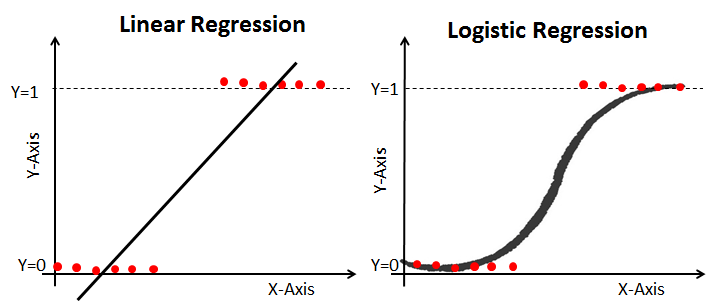

> **1. [LR] 모델 정의**

In [16]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(verbose=2)

- 모델을 생성할 때 파라미터를 조정할 수 있으며, 파라미터는 `.get_params()`를 통해 확인할 수 있다.
- 파라미터의 종류는 모델마다 다르다.

In [17]:
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

> **2. [LR] 모델 학습**

In [18]:
lr_model.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=2)

> **3. [LR] 예측**

In [19]:
# 수컷(Male): 1, 암컷(Female): 0
predictions = lr_model.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0])

In [20]:
# 성능 평가
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(Y_test, predictions)
print(f'Logistic Regression 모델의 예측 정확도는 {round(lr_acc*100)}%입니다.')

Logistic Regression 모델의 예측 정확도는 93%입니다.


### **4-4-4. K-최근접 이웃 분류기(K-NeighborsClassifier)**

> - 입력 데이터가 주어졌을 때, 입력 값과 가까운 K개의 데이터가 속해 있는 범주로 예측해주는 알고리즘이다.
- 데이터 간 거리를 측정할 때 '유클리드 거리'를 사용한다.
- 비교적 간단한 알고리즘이지만, **이미지 처리, 영상/얼굴 인식, 상품 추천, 의료, 유전자 패턴 인식 등** 다양한 분야에서 널리 사용된다.

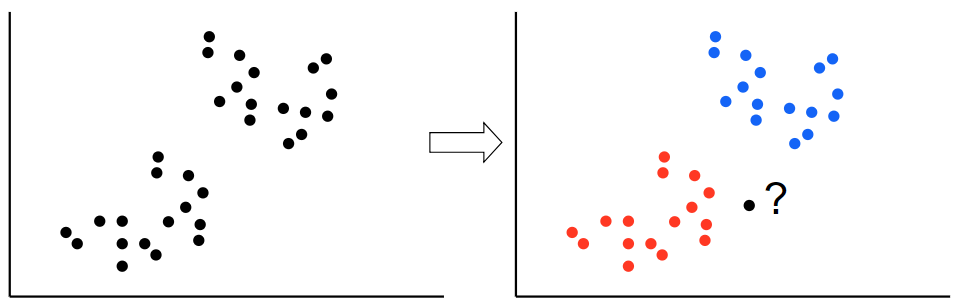

> **1. [KNC] 모델 정의**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier()

In [39]:
# 파라미터 종류
knc_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

> **2. [KNC] 모델 학습**

In [40]:
knc_model.fit(X_train, Y_train)

KNeighborsClassifier()

> **3. [KNC] 예측**

In [41]:
# 수컷(Male): 1, 암컷(Female): 0
predictions = knc_model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0])

In [42]:
# 성능 평가
from sklearn.metrics import accuracy_score
knc_acc = accuracy_score(Y_test, predictions)
print(f'KNeighborsClassifier 모델의 예측 정확도는 {round(knc_acc*100)}% 입니다.')

KNeighborsClassifier 모델의 예측 정확도는 90% 입니다.


### **4-4-5. 의사결정 나무(Decision Tree)**

> - 의사결저아무(Decision Tree)란 의사 결정 규칙을 나무(tree) 구조로 나타내어서 전체 데이터를 분류하거나, 수치형 자료를 예측하는데 모두 사용할 수 있는 알고리즘이다.
- 의사결정 나무 알고리즘은 가지 분할(split), 가지 치기(pruning) 방법을 사용해서 복잡한 모형에서 단순화시키는 과정을 거친다.
- 나무 모형의 크기에 따라 머신 러닝 성능이 달라지기 때문에 적절한 크기로 설정해주는 것이 좋다.

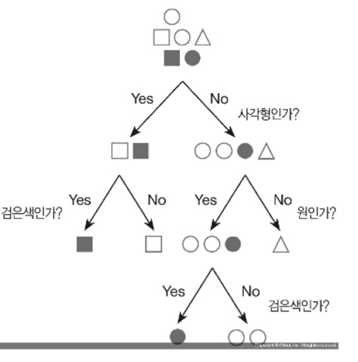

> **1. [DT] 모델 정의**

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

In [44]:
# 파라미터 종류
dtc_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

> **2. [DT] 모델 학습**

In [45]:
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

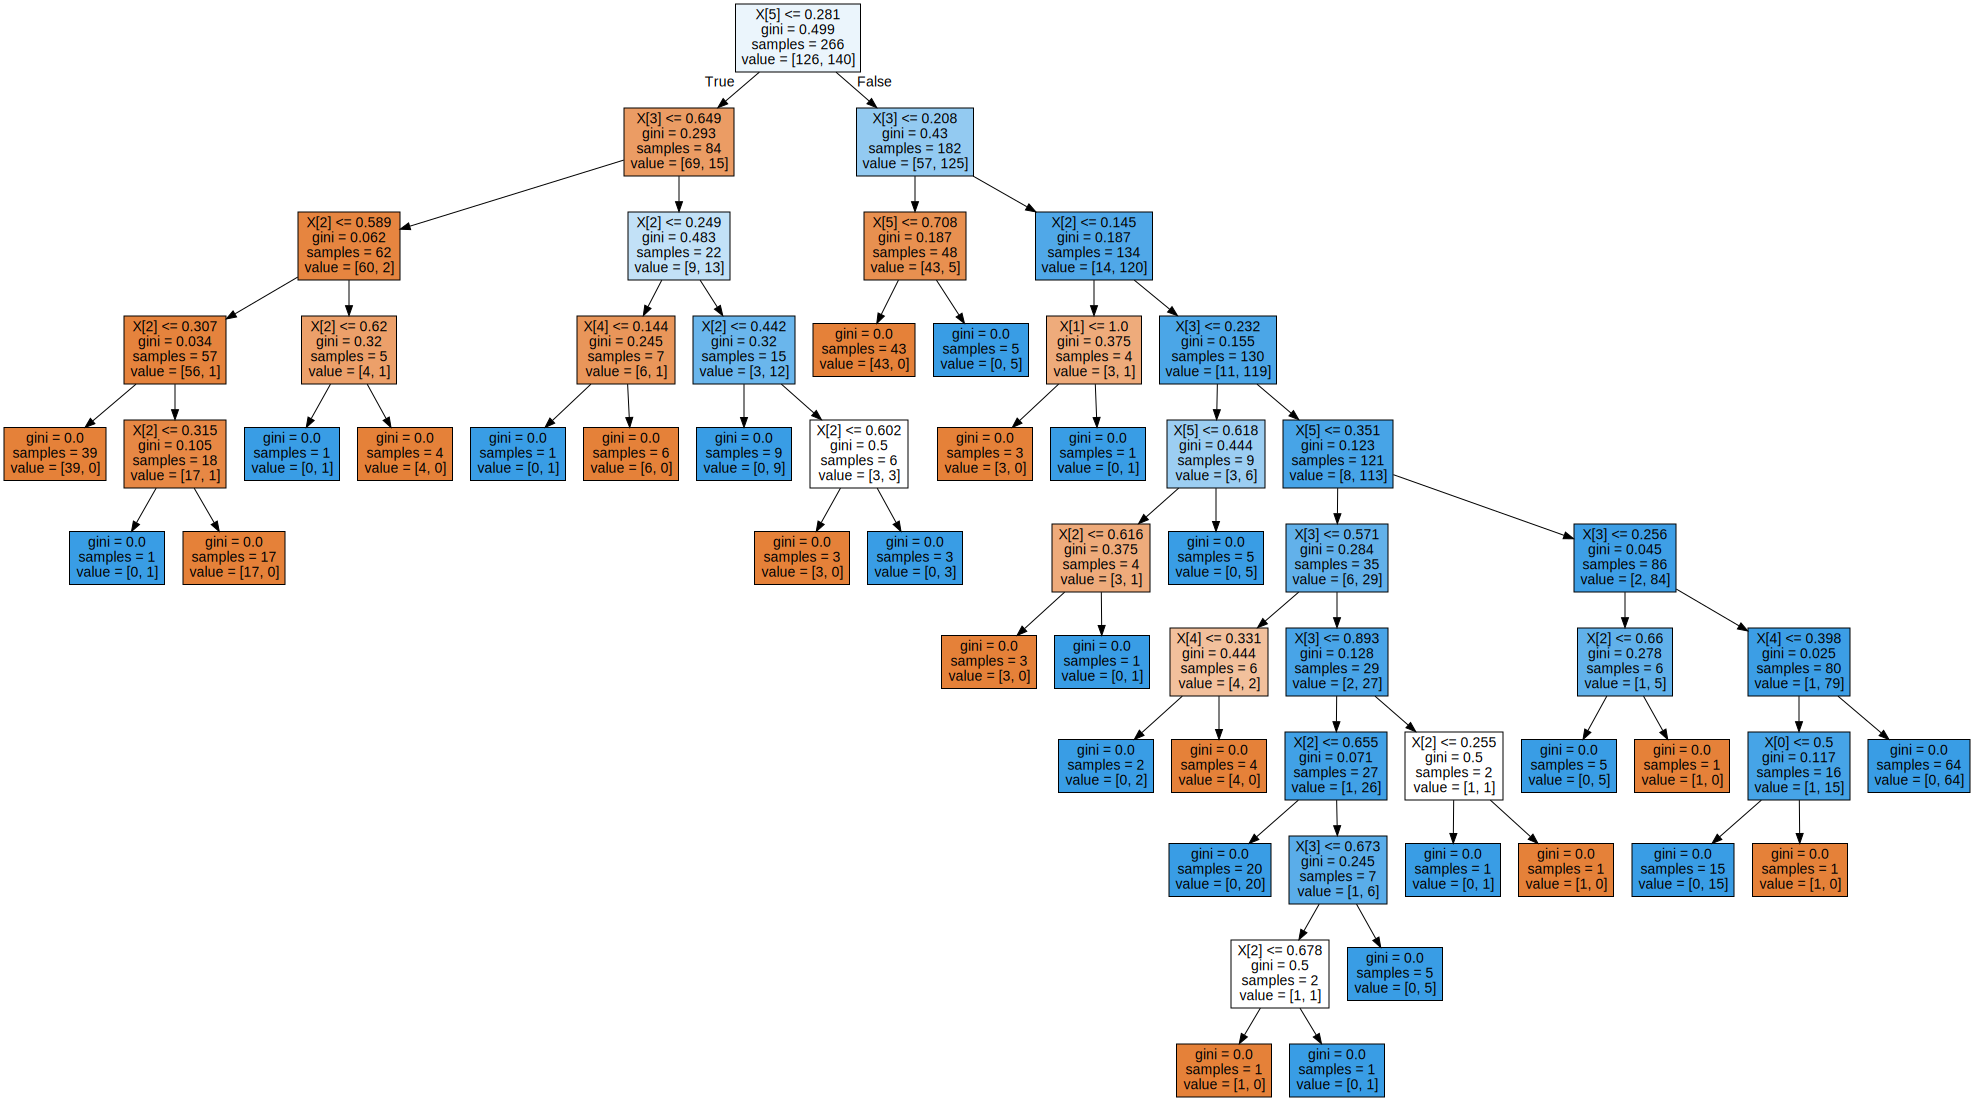

In [51]:
# 학습된 나무 시각화 ; 의사결정 나무의 규칙들과 수치들을 확인할 수 있다.
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtc_model, filled=True)
graphviz.Source(dot_data)

> **3. [DT] 예측**

In [52]:
# 수컷(Male): 1, 암컷(Female): 0
predictions = dtc_model.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0])

In [53]:
# 성능 평가
from sklearn.metrics import accuracy_score
dtc_acc = accuracy_score(Y_test, predictions)
print(f'Decision Tree 모델의 예측 정확도는 {round(dtc_acc*100)}% 입니다.')

Decision Tree 모델의 예측 정확도는 87% 입니다.


### **4-4-6. 서포트 벡터 분류기(SVC)**

> - 서포트 벡터 분류기(Support Vector Classifier)이란 두 데이터 그룹으로부터 최대한 멀리 떨어져 있는 초평면(Optimal Hyperplane)을 구하고, 이것을 사용하는 이진 분류 모델이다.
- 서포트 벡터는 이 초평면을 결정하기 위해 사용되는 데이터 집합이다.
- 분류나 예측 문제에 동시에 사용할 수 있다.
- 데이터가 많을 때, 예측의 정확도가 비교적 높은 편이다.

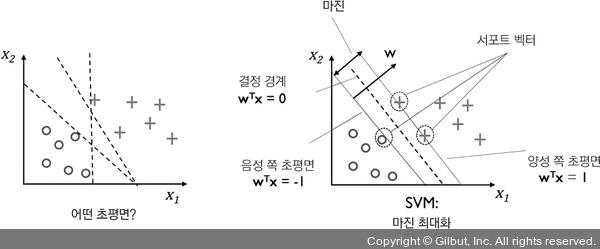

> **1. [SVC] 모델 정의**

In [54]:
from sklearn.svm import SVC
svc_model = SVC()

In [55]:
# 파라미터 종류
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

> **2. [SVC] 모델 학습**

In [56]:
svc_model.fit(X_train, Y_train)

SVC()

> **3. [SVC] 예측**

In [60]:
# 수컷(Male): 1, 암컷(Female): 0
predictions = svc_model.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0])

In [62]:
# 성능 평가
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(Y_test, predictions)
print(f'Support Vector Classfier 모델의 예측 정확도는 {round(svc_acc*100)}% 입니다.')

Support Vector Classfier 모델의 예측 정확도는 94% 입니다.


> **분류 모델 별 예측 정확도**

In [65]:
accuracy_table = pd.DataFrame({'Logistic Regression': [str(round(lr_acc*100)) + '%'],
                               'K-Neighbors' : [str(round(knc_acc*100)) +'%'],
                               'Decision Tree' : [str(round(dtc_acc*100)) +'%'],
                               'SVC' : [str(round(svc_acc*100)) +'%']})
accuracy_table

,Logistic Regression,K-Neighbors,Decision Tree,SVC
0,93%,90%,87%,94%


## **4-5. 분류 성능 평가하기**